In [19]:
# LSTM
# 导入包
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from keras.layers import Input, Dense, LSTM, merge
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import Dropout
import numpy as np

#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import f_regression
#from sklearn.pipeline import Pipeline
#from sklearn.svm import LinearSVC
#from sklearn.feature_selection import SelectFromModel
#from sklearn.datasets import load_iris
#from sklearn.linear_model import RandomizedLasso
#from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.feature_selection import RFE
#from sklearn.ensemble import RandomForestRegressor
from keras.layers import Masking, Embedding

import talib

# 基础参数配置
# 基础参数配置
class conf:
   # instrument = '600159.SHA'  #股票代码 0.59
   # instrument = '600477.SHA'  #股票代码 0.64
   # instrument = '600036.SHA'  #股票代码 0.61
   # instrument = '000001.SHA'   # 0.63
    instrument ='000300.SHA' 
    #设置用于训练和回测的开始/结束日期
    start_date = '2005-01-01'
    split_date = '2014-07-20'
    end_date = '2017-07-20'
    fields = ['close', 'open', 'high', 'low', 'amount', 'volume'
             # ,'MACD'
              #'MACDsignal',
             # 'MACDhist',
             # ,'ULT'
              #'trix','mfi'
              
              #,'adx','adxr','minus_di', 'ppo', 'dx', 'cmo'
              #,'roc',
              #'kama','atr','avgprice','bop','cci','cmo','dema'
             #, 'adosc','dx',,'minus_di','minus_dm','mom','natr','plus_dm','ppo','t3','wma'
             # ,'MA_5','MA_10','EMA6','MA_20'
              #,'cdl2','cld3',
#               'cdl3insider','cdl3outside','cdl3star','cdl3ws','cdlabby','cdladvance','cdlbelth','cdlbreak','cdlclosin',
#               'cdlcon','cdlcoun','cdldark','cdldojistar','cdldrago','cdlengulfing','cdleveningstar','cdlgrave',
#              'cdlhammer','cdlhangman','cdlharamicross','cdlhighwave','cdlhikkake','cdlpigeon','cdlnneck','cdlinvertedhammer',
#               'cdlkicking','cdlladdr','cdllongline','cdlmarubo','cdlmatchinglow','cdlmathold','cdlmorning','cdlonneck',
#               'cdlpiercing','cdlrickshawman','cdlrisefall','cdlseparating','cdlshooting','cdlshorline','cdlspinningtop',
#               'cdlstalledpattern','cdlsticksand','cdltakuri','cdltasukigap','cdlthrusting','cdltristar','cdlunique3river',
#               'cdlupsidegap','cdlxsidegap'
             ]  # D.historial data 
    
   
    
    seq_len = 30 #每个input的长度
    batch = 100 #整数，指定进行梯度下降时每个batch包含的样本数,训练时一个batch的样本会被计算一次梯度下降，使目标函数优化一步
    
 

 # 数据导入以及初步处理
data = D.history_data(conf.instrument, conf.start_date, conf.end_date, conf.fields)

data['return']=data['close'].shift(-3)/data['close'].shift(-1) -1 #注意shift的时间
data.dropna(inplace=True)
datatime = data['date'][data.date>=conf.split_date]  #记录predictions的时间，回测要用
data['return'] = data['return'].apply(lambda x:np.where(x>=0.2,0.2,np.where(x>-0.2,x,-0.2)))  #去极值
data['return'] = data['return']*10  # 适当增大return范围，利于LSTM模型训练
data.reset_index(drop=True, inplace=True)


opening=[float(x) for x in data ['open']]
close = [float(x) for x in data['close']]
low = [float(x) for x in data['low']]
high= [float(x) for x in data['high']]
volume=[float(x) for x in data['volume']]

print("done")

done


In [20]:
data['MA_5']=talib.MA(np.array(close), timeperiod=5) 
data['MA_10']=talib.MA(np.array(close),timeperiod=10)
data['MA_20']=talib.MA(np.array(close),timeperiod=20)
data['EMA6'] = talib.EMA(np.array(close), timeperiod=6)  
data['MACD'],data['MACDsignal'],data['MACDhist'] = talib.MACD(np.array(close),fastperiod=6, slowperiod=12, signalperiod=9)                              
data['ULT']=talib.ULTOSC(np.array(high),np.array(low),np.array(close),timeperiod1=7,timeperiod2=14,timeperiod3=28)
#data['will']=talib.WILLR(np.array(high),np.array(low),np.array(close), timeperiod=5)
#data ['rsi']=talib.RSI(np.array(close),timeperiod=5)
data['roc']=talib.ROC(np.array(close))
data['kama']=talib.KAMA(np.array(close),timeperiod=7)
data['adosc']=talib.ADOSC(np.array(high),np.array(low),np.array(close),np.array(volume),fastperiod=3,slowperiod=10)
data['adx']=talib.ADX(np.array(high),np.array(low),np.array(close),timeperiod=14)
data['adxr']=talib.ADXR(np.array(high),np.array(low),np.array(close),timeperiod=14)
#data['aroon']=talib.AROON(np.array(high),np.array(low))
data['atr']=talib.ATR(np.array(high),np.array(low),np.array(close),timeperiod=14)#15
data['avgprice']=talib.AVGPRICE(np.array(opening),np.array(high),np.array(low),np.array(close))
#data['bbands']=talib.BBANDS(np.array(close),timeperiod=14, nbdevdn=2,nbdevup=2,matype=0)
data['bop']=talib.BOP(np.array(opening),np.array(high),np.array(low),np.array(close))
data ['cci']=talib.CCI(np.array(high),np.array(low),np.array(close))
data['cmo']=talib.CMO(np.array(close),timeperiod=14)
data ['dema']=talib.DEMA(np.array(close),timeperiod=30)
data ['dx']=talib.DX(np.array(high),np.array(low),np.array(close),timeperiod=14) #21
data ['mfi']=talib.MFI(np.array(high),np.array(low),np.array(close),np.array(volume),timeperiod=14)
data['minus_di']=talib.MINUS_DI(np.array(high),np.array(low),np.array(close),timeperiod=14)
data ['minus_dm']=talib.MINUS_DM(np.array(high),np.array(low),timeperiod=14)
data ['mom']=talib.MOM(np.array(close),timeperiod=10)
data ['natr']=talib.NATR(np.array(high),np.array(low),np.array(close),timeperiod=14)
data ['plus_dm']=talib.PLUS_DM(np.array(high),np.array(low),timeperiod=14)
data ['ppo']=talib.PPO(np.array(close))
#data ['stoch']=talib.STOCH(np.array(high),np.array(low),np.array(close),fastk_period=5,slowd_period=3,slowk_matype=0)
data ['t3']=talib.T3(np.array(close),timeperiod=5,vfactor=0.7) #30
data ['trix']=talib.TRIX(np.array(close),timeperiod=30)
data ['wma']=talib.WMA(np.array(close))

# data ['cdl2']=talib.CDL2CROWS(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cld3']=talib.CDL3BLACKCROWS(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdl3insider']=talib.CDL3INSIDE(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdl3outside']=talib.CDL3OUTSIDE(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdl3star']=talib.CDL3STARSINSOUTH(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdl3ws']=talib.CDL3WHITESOLDIERS(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdlabby']=talib.CDLABANDONEDBABY(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdladvance']=talib.CDLADVANCEBLOCK(np.array(opening),np.array(high),np.array(low),np.array(close)) #40
# data ['cdlbelth']=talib.CDLBELTHOLD(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdlbreak']=talib.CDLBREAKAWAY(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdlclosin']=talib.CDLCLOSINGMARUBOZU(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdlcon']=talib.CDLCONCEALBABYSWALL(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdlcoun']=talib.CDLCOUNTERATTACK(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdldark']=talib.CDLDARKCLOUDCOVER(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdldojistar']=talib.CDLDOJISTAR(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdldrago']=talib.CDLDRAGONFLYDOJI(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdlengulfing']=talib.CDLENGULFING(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdleveningstar']=talib.CDLEVENINGSTAR(np.array(opening),np.array(high),np.array(low),np.array(close))#50
# data ['cdlgrave']=talib.CDLGRAVESTONEDOJI(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdlhammer']=talib.CDLHAMMER(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdlhangman']=talib.CDLHANGINGMAN(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdlharamicross']=talib.CDLHARAMICROSS(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdlhighwave']=talib.CDLHIGHWAVE(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdlhikkake']=talib.CDLHIKKAKE(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdlpigeon']=talib.CDLHOMINGPIGEON(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdlnneck']=talib.CDLINNECK(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdlinvertedhammer']=talib.CDLINVERTEDHAMMER(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdlkicking']=talib.CDLKICKING(np.array(opening),np.array(high),np.array(low),np.array(close)) #60
# data ['cdlladdr']=talib.CDLLADDERBOTTOM(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdllongline']=talib.CDLLONGLINE(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdlmarubo']=talib.CDLMARUBOZU(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdlmatchinglow']=talib.CDLMATCHINGLOW(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdlmathold']=talib.CDLMATHOLD(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdlmorning']=talib.CDLMORNINGSTAR(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdlonneck']=talib.CDLONNECK(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdlpiercing']=talib.CDLPIERCING(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdlrickshawman']=talib.CDLRICKSHAWMAN(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdlrisefall']=talib.CDLRISEFALL3METHODS(np.array(opening),np.array(high),np.array(low),np.array(close))#70
# data ['cdlseparating']=talib.CDLSEPARATINGLINES(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdlshooting']=talib.CDLSHOOTINGSTAR(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdlshorline']=talib.CDLSHORTLINE(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdlspinningtop']=talib.CDLSPINNINGTOP(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdlstalledpattern']=talib.CDLSTALLEDPATTERN(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdlsticksand']=talib.CDLSTICKSANDWICH(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdltakuri']=talib.CDLTAKURI(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdltasukigap']=talib.CDLTASUKIGAP(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdlthrusting']=talib.CDLTHRUSTING(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdltristar']=talib.CDLTRISTAR(np.array(opening),np.array(high),np.array(low),np.array(close)) #80
# data ['cdlunique3river']=talib.CDLUNIQUE3RIVER(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdlupsidegap']=talib.CDLUPSIDEGAP2CROWS(np.array(opening),np.array(high),np.array(low),np.array(close))
# data ['cdlxsidegap']=talib.CDLXSIDEGAP3METHODS(np.array(opening),np.array(high),np.array(low),np.array(close))

print (data.shape)
#print (data)
#data=data.ix[4:len(data)]
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
scaledata = data[conf.fields]# need to add all other features
traindata = data[data.date<conf.split_date]
print(traindata.shape)
print(scaledata.shape)
print(len(datatime))
#print (data)

(3045, 39)
(2227, 39)
(2957, 6)
730


In [70]:
#do not run
# print(train_x.shape)



# feature selction data
cols = list(traindata.columns)
cols.remove('instrument')
cols.remove('return')
cols.remove('date')

df=traindata[cols]

for col in cols:
    col_zscore = col
    df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)

print(df.shape)
df_new=df.dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)
print(df_new.shape)
#print(traindata.shape)
#print (scaledata.shape)   
#print(len(train_input))
#print(train_x.shape)
#print(test_x.shape)
#print (df_new)

(2840, 36)
(2840, 36)


In [75]:
y=np.array(traindata['return'])
for i in range(len(traindata['return'])):
    if traindata['return'][i]>0:
        y[i]=1
 
    else:
        y[i]=-1
        
print(y.shape)
print(df_new.shape)
print(y)


(2840,)
(2840, 80)
[-1.  1.  1. ...,  1.  1.  1.]


Feature ranking:
1. feature 33 (0.027093)
2. feature 25 (0.026794)
3. feature 12 (0.026359)
4. feature 17 (0.026141)
5. feature 16 (0.025829)
6. feature 26 (0.025465)
7. feature 31 (0.025448)
8. feature 24 (0.025121)
9. feature 22 (0.025024)
10. feature 11 (0.024945)
11. feature 13 (0.024576)
12. feature 29 (0.024456)
13. feature 21 (0.024341)
14. feature 20 (0.024333)
15. feature 15 (0.024291)
16. feature 9 (0.024198)
17. feature 10 (0.024137)
18. feature 5 (0.024120)
19. feature 30 (0.024041)
20. feature 28 (0.024039)
21. feature 27 (0.023841)
22. feature 18 (0.023518)
23. feature 1 (0.023419)
24. feature 23 (0.022272)
25. feature 34 (0.021936)
26. feature 7 (0.021930)
27. feature 14 (0.021731)
28. feature 2 (0.021472)
29. feature 6 (0.021402)
30. feature 4 (0.021395)
31. feature 19 (0.021275)
32. feature 3 (0.020984)
33. feature 8 (0.020888)
34. feature 0 (0.020838)
35. feature 32 (0.020815)
36. feature 42 (0.012652)
37. feature 70 (0.012192)
38. feature 47 (0.012107)
39. feature 59

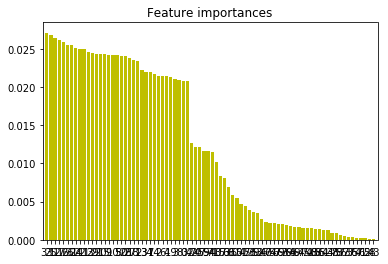

In [76]:
#feature selection

X=df_new
#lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)

forest = ExtraTreesClassifier(n_estimators=250,random_state=0).fit(X,y)

#rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), 4).fit(X,y)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="y",  align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


# extract features


#print(y)

#model = SelectFromModel(forest, prefit=True)
#X_new = model.transform(X)
#print (X.shape)
#print (X_new.shape)



In [77]:

for stop in range(X.shape[1]):
    if importances[indices[stop]]<0.015 :
        print(stop)
        break


f_selected=X.ix[:,indices[0:stop]]
#print(f_selected)
cols2=list(f_selected.columns)
print(cols2)
print (traindata.shape) 

35
['trix', 'mfi', 'ULT', 'adxr', 'adx', 'minus_di', 'ppo', 'dx', 'cmo', 'MACDhist', 'roc', 'natr', 'cci', 'bop', 'adosc', 'MACD', 'MACDsignal', 'volume', 'plus_dm', 'mom', 'minus_dm', 'atr', 'amount', 'dema', 'wma', 'MA_10', 'kama', 'low', 'MA_5', 'open', 'avgprice', 'close', 'EMA6', 'high', 't3']
(2840, 89)


In [83]:
#random forest regression
X2=X[cols2]
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X2, y)

for j in range(len(traindata), len(data)):
    b = scale(scaledata[j+1-conf.seq_len:j+1])
    test_input.append(b)
    c = data['return'][j]
    test_output.append(c)


print('lsvc')



lsvc


In [21]:
# 数据处理：设定每个input（30time series×8features）以及数据标准化
train_input = []
train_output = []
test_input = []
test_output = []

#scaledata=data[cols2]

for i in range(conf.seq_len-1, len(traindata)):
    a = scale(scaledata[i+1-conf.seq_len:i+1])
   # d= scale(scaledata[i:i+1])
    train_input.append(a)
    # print(a)
    c = data['return'][i]
    train_output.append(c)
  
    
for j in range(len(traindata), len(data)):
    b = scale(scaledata[j+1-conf.seq_len:j+1])
    test_input.append(b)
    c = data['return'][j]
    test_output.append(c)
   

 # LSTM接受数组类型的输入
train_x = np.array(train_input)
train_y = np.array(train_output)
test_x = np.array(test_input)
test_y = np.array(test_output)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(2198, 30, 6)
(2198,)
(730, 30, 6)
(730,)


In [22]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20)
# model.fit(x, y, validation_split=0.2, callbacks=[early_stopping])


# 自定义激活函数
import tensorflow as tf
def atan(x): 
    return tf.atan(x)

# 构建神经网络层 2层LSTM层+3层Dense层+attention



def attention_block(inputs):
    # inputs.shape = (batch_size, time_steps, input_dim)
    input_dims = 128
   # a = Permute((2, 1))(inputs)
   # a = Reshape((input_dim, TIME_STEPS))(a)
    attention_probs = Dense(input_dims, activation='softmax',name='attention_probs')(inputs)
   # if SINGLE_ATTENTION_VECTOR:
   # a = Lambda(lambda x: K.mean(x, axis=1), name='dim_reduction')(a)
   # a = RepeatVector(input_dim)(a)
   # a_probs = Permute((2, 1), name='attention_vec')(a)
    output_attention_mul = merge([inputs, attention_probs], name='attention_mul', mode='mul')
    return output_attention_mul



dropout_value=0.2

lstm_input = Input(shape=(conf.seq_len,len(conf.fields),), name='lstm_input')

#lstm_mask= Masking(mask_value=-1)(lstm_input)

lstm_output = LSTM(256, activation=atan, dropout=dropout_value, 
                   return_sequences=True, unit_forget_bias=True,recurrent_dropout=dropout_value)(lstm_input)

lstm_output2= LSTM(128, activation=atan, dropout=dropout_value, 
                   return_sequences=False, unit_forget_bias=True, recurrent_dropout=dropout_value)(lstm_output)

#attention_mul=attention_block(lstm_output2)
#attention_mul=Flatten()(attention_mul)

#aux_input = Input(shape=(1,), name='aux_input')

#merged_data = merge([lstm_output2, aux_input], mode='concat', concat_axis=-1)
Dense_output_1 = Dense(32, activation='linear',kernel_regularizer=regularizers.l2(0.01))(lstm_output2)
Drop_out_1=Dropout(dropout_value)(Dense_output_1)
#Dense_output_2 = Dense(16, activation='linear',kernel_regularizer=regularizers.l2(0.01))(Drop_out_1)
#Drop_out_2=Dropout(dropout_value)(Dense_output_2)
predictions = Dense(1, activation=atan)(Drop_out_1)

model = Model(input=lstm_input, output=predictions)

model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    
model.fit(train_x, train_y, validation_split=0.2, batch_size=conf.batch,  nb_epoch=150, verbose=2
         ,callbacks=[early_stopping])
         





Train on 1758 samples, validate on 440 samples
Epoch 1/150
9s - loss: 0.5505 - mean_squared_error: 0.0867 - val_loss: 0.4392 - val_mean_squared_error: 0.0350
Epoch 2/150
7s - loss: 0.4374 - mean_squared_error: 0.0792 - val_loss: 0.3434 - val_mean_squared_error: 0.0355
Epoch 3/150
7s - loss: 0.3503 - mean_squared_error: 0.0793 - val_loss: 0.2662 - val_mean_squared_error: 0.0350
Epoch 4/150
7s - loss: 0.2808 - mean_squared_error: 0.0782 - val_loss: 0.2056 - val_mean_squared_error: 0.0337
Epoch 5/150
7s - loss: 0.2286 - mean_squared_error: 0.0786 - val_loss: 0.1611 - val_mean_squared_error: 0.0346
Epoch 6/150
7s - loss: 0.1888 - mean_squared_error: 0.0789 - val_loss: 0.1260 - val_mean_squared_error: 0.0338
Epoch 7/150
7s - loss: 0.1578 - mean_squared_error: 0.0780 - val_loss: 0.1007 - val_mean_squared_error: 0.0341
Epoch 8/150
7s - loss: 0.1339 - mean_squared_error: 0.0765 - val_loss: 0.0823 - val_mean_squared_error: 0.0346
Epoch 9/150
7s - loss: 0.1181 - mean_squared_error: 0.0772 - val_

In [23]:
# 预测
predictions=model.predict(test_x)



#print ((predictions))

# 如果预测值>0,取为1；如果预测值<=0,取为-1.为回测做准备
for i in range(len(predictions)):
    if predictions[i]>0:
        predictions[i]=1
 
    else:
        predictions [i]=-1
        
lable=np.array(test_y)   
for j in range(len(test_y)):
    if test_y[j]>0:
        lable[j]=1
    else:
        lable[j]=-1
       
        
#print ((test_y))


# lable=np.array(train_y)   
# for j in range(len(train_y)):
#     if train_y[j]>0:
#         lable[j]=1
#     elif train_y[j]<=0:
#         lable[j]=-1
       
print(len(predictions))        



# datatime_train = data['date'][data.date<conf.split_date]  #记录predictions的时间，回测要用

cc = np.reshape(predictions,len(predictions), 1)


databacktest = pd.DataFrame()
databacktest['date'] = datatime

#print(len(datatime))

# databacktest['date'] = datatime_train
#print(len(databacktest))

databacktest['direction'] = np.round(cc)    
 

730


In [29]:
# 在沪深300上回测
def initialize(context):
    # 系统已经设置了默认的交易手续费和滑点，要修改手续费可使用如下函数
    context.set_commission(PerOrder(buy_cost=0.0003, sell_cost=0.0013, min_cost=5))
    # 传入预测数据和真实数据
    context.predictions=databacktest
    
    context.hold=conf.split_date
    
    correct_pred = tf.equal(context.predictions['direction'].values[:], lable)
    predic=[]
    predic=np.array(context.predictions['direction'].values[:])
    
   
    
    TP=0
    TPFP=0
    for j in range(len(predic)):
        if predic[j]==1:
            TPFP+=1
        if predic[j]==lable[j] and lable[j]==1:
            TP+=1
            
    print (TP/TPFP)
    
    
    FN=0
    FNFP=0
    for j in range(len(predic)):
        if predic[j]==-1:
            FNFP+=1
        if predic[j]==lable[j] and lable [j]==-1:
            FN+=1
            
    print (FN/FNFP)

    print (TPFP/FNFP)
# 回测引擎：每日数据处理函数，每天执行一次
def handle_data(context, data):
    current_dt = data.current_dt.strftime('%Y-%m-%d') 
    sid = context.symbol(conf.instrument)
    cur_position = context.portfolio.positions[sid].amount    # 持仓
    if cur_position==0:
        if databacktest['direction'].values[databacktest.date==current_dt]==1:
            context.order_target_percent(sid, 0.9)
            context.date=current_dt
            
            
    else:
        if databacktest['direction'].values[databacktest.date==current_dt]==-1:
            if context.trading_calendar.session_distance(pd.Timestamp(context.date), pd.Timestamp(current_dt))>=3:
                context.order_target(sid, 0)
                
                

# 调用回测引擎
m8 = M.backtest.v5(
    instruments=conf.instrument,
    start_date=conf.split_date,
    end_date=conf.end_date,
    initialize=initialize,
    handle_data=handle_data,
    order_price_field_buy='open',       # 表示 开盘 时买入
    order_price_field_sell='close',     # 表示 收盘 前卖出
    capital_base=100000, 
    benchmark=conf.instrument, 
    m_cached=False
)       

[2017-08-03 14:13:17.504575] WARNING: bigquant: 此模块版本 M.backtest.v5 已不再维护，并可能在未来被删除：请更新到 backtest 最新版本
[2017-08-03 14:13:17.505849] INFO: bigquant: backtest.v5 start ..
0.5627376425855514
0.4215686274509804
2.5784313725490198
[2017-08-03 14:13:21.122289] INFO: Performance: Simulated 733 trading days out of 733.
[2017-08-03 14:13:21.123363] INFO: Performance: first open: 2014-07-21 13:30:00+00:00
[2017-08-03 14:13:21.124145] INFO: Performance: last close: 2017-07-20 19:00:00+00:00


[2017-08-03 14:13:23.912144] INFO: bigquant: backtest.v5 end [6.40625s].


In [51]:
databacktest.to_csv('signal_3years.csv')
#np.set_printoptions(threshold='nan') 
signal1year=pd.read_csv('signal_1year.csv')
print (signal1year['date'].to_string (index=False))

2016-07-20
2016-07-21
2016-07-22
2016-07-25
2016-07-26
2016-07-27
2016-07-28
2016-07-29
2016-08-01
2016-08-02
2016-08-03
2016-08-04
2016-08-05
2016-08-08
2016-08-09
2016-08-10
2016-08-11
2016-08-12
2016-08-15
2016-08-16
2016-08-17
2016-08-18
2016-08-19
2016-08-22
2016-08-23
2016-08-24
2016-08-25
2016-08-26
2016-08-29
2016-08-30
2016-08-31
2016-09-01
2016-09-02
2016-09-05
2016-09-06
2016-09-07
2016-09-08
2016-09-09
2016-09-12
2016-09-13
2016-09-14
2016-09-19
2016-09-20
2016-09-21
2016-09-22
2016-09-23
2016-09-26
2016-09-27
2016-09-28
2016-09-29
2016-09-30
2016-10-10
2016-10-11
2016-10-12
2016-10-13
2016-10-14
2016-10-17
2016-10-18
2016-10-19
2016-10-20
2016-10-21
2016-10-24
2016-10-25
2016-10-26
2016-10-27
2016-10-28
2016-10-31
2016-11-01
2016-11-02
2016-11-03
2016-11-04
2016-11-07
2016-11-08
2016-11-09
2016-11-10
2016-11-11
2016-11-14
2016-11-15
2016-11-16
2016-11-17
2016-11-18
2016-11-21
2016-11-22
2016-11-23
2016-11-24
2016-11-25
2016-11-28
2016-11-29
2016-11-30
2016-12-01
2016-12-02

In [222]:
#lstm + stockranker



# 基础参数配置
class conf:
    start_date = '2010-01-01'
    split_date = '2014-07-20'
    end_date='2017-07-20'
   
   
    # D.instruments: https://bigquant.com/docs/data_instruments.html
    instruments = D.instruments(start_date, end_date)

    # 机器学习目标标注函数
    # 如下标注函数等价于 min(max((持有期间的收益 * 100), -20), 20) + 20 (后面的M.fast_auto_labeler会做取整操作)
    # 说明：max/min这里将标注分数限定在区间[-20, 20]，+20将分数变为非负数 (StockRanker要求标注分数非负整数)
    label_expr = ['return * 100', 'where(label > {0}, {0}, where(label < -{0}, -{0}, label)) + {0}'.format(20)]
    # 持有天数，用于计算label_expr中的return值(收益)
    hold_days = 5

    # 特征 https://bigquant.com/docs/data_features.html，你可以通过表达式构造任何特征
    features = [
       
        'close_5/close_0',  # 5日收益
        'close_10/close_0',  # 10日收益
        'close_20/close_0',  # 20日收益
        'avg_amount_0/avg_amount_5',  # 当日/5日平均交易额
        'rank_return_0',  # 当日收益
        'rank_return_5',  # 5日收益
      #  'avg_turn_5',  # 5日平均换手率
      # 'avg_amount_5/avg_amount_10',
      # 'avg_amount_5/avg_amount_20',  # 5日/20日平均交易额 ?
      # 'rank_avg_amount_0/rank_avg_amount_5',  # 当日/5日平均交易额排名
      # 'rank_avg_amount_5/rank_avg_amount_10',  # 5日/10日平均交易额排名
      # 'rank_return_10',  # 10日收益
      # 'rank_return_0/rank_return_3',  # 当日/5日收益排名
      # 'rank_return_5/rank_return_10',  # 5日/10日收益排名
      # 'pe_ttm_0',  # 市盈率TTM
       
      #  'market_cap_float_0',
      #  'rank_fs_net_profit_yoy_0',
      #  'swing_volatility_30',
      #  'rank_swing_volatility_30',
       
      #  '(high_0-low_0+high_1-low_1+high_2-low_2+high_3-low_3+high_4-low_4)/5',  # 5日平均振幅
      #  'pe_lyr_0',  # 市盈率LYR
      #   'mf_net_amount_5',  # 5日净主动买入额
      #   'mf_net_amount_10',  # 10日净主动买入额
      #  'mf_net_amount_20',  # 20日净主动买入额
       
      #  'return_20',
      #  'market_cap_0',
      #  'pe_ttm_0',
      #  'mf_net_amount_5',
      #  'fs_deducted_profit_ttm_0',
      #  'fs_net_profit_yoy_0',
      #  'fs_roe_0',
      #  'sh_holder_avg_pct_3m_chng_0',
      #  'ta_rsi_28_0',
        
    ]

# 给数据做标注：给每一行数据（样本）打分，一般分数越高表示越好
m1 = M.fast_auto_labeler.v5(
    instruments=conf.instruments, start_date=conf.start_date, end_date=conf.end_date,
    label_expr=conf.label_expr, hold_days=conf.hold_days,
    benchmark='000300.SHA', sell_at='open', buy_at='open')
# 计算特征数据
m2 = M.general_feature_extractor.v5(
    instruments=conf.instruments, start_date=conf.start_date, end_date=conf.end_date,
    features=conf.features)
# 数据预处理：缺失数据处理，数据规范化，T.get_stock_ranker_default_transforms为StockRanker模型做数据预处理
m3 = M.transform.v2(
    data=m2.data, transforms=T.get_stock_ranker_default_transforms(),
    drop_null=True, astype='int32', except_columns=['date', 'instrument'],
    clip_lower=0, clip_upper=200000000)
# 合并标注和特征数据
m4 = M.join.v2(data1=m1.data, data2=m3.data, on=['date', 'instrument'], sort=True)

# 训练数据集
m5_training = M.filter.v2(data=m4.data, expr='date < "%s"' % conf.split_date)
# 评估数据集
m5_evaluation = M.filter.v2(data=m4.data, expr='"%s" <= date' % conf.split_date)
# StockRanker机器学习训练
m6 = M.stock_ranker_train.v2(training_ds=m5_training.data, features=conf.features)
# 对评估集做预测
m7 = M.stock_ranker_predict.v2(model_id=m6.model_id, data=m5_evaluation.data)


## 量化回测 https://bigquant.com/docs/strategy_backtest.html
# 回测引擎：初始化函数，只执行一次
def initialize(context):
    # 系统已经设置了默认的交易手续费和滑点，要修改手续费可使用如下函数
    context.set_commission(PerOrder(buy_cost=0.0003, sell_cost=0.0013, min_cost=5))
    # 预测数据，通过options传入进来，使用 read_df 函数，加载到内存 (DataFrame)
    context.ranker_prediction = context.options['ranker_prediction'].read_df()
    # 设置买入的股票数量，这里买入预测股票列表排名靠前的5只
    stock_count = 5
    # 每只的股票的权重，如下的权重分配会使得靠前的股票分配多一点的资金，[0.339160, 0.213986, 0.169580, ..]
    context.stock_weights = T.norm([1 / math.log(i + 2) for i in range(0, stock_count)])
    # 设置每只股票占用的最大资金比例
    context.max_cash_per_instrument = 0.2
    
    context.date={}

# 回测引擎：每日数据处理函数，每天执行一次
def handle_data(context, data):
    # 按日期过滤得到今日的预测数据
    ranker_prediction = context.ranker_prediction[context.ranker_prediction.date == data.current_dt.strftime('%Y-%m-%d')]
    current_dt = data.current_dt.strftime('%Y-%m-%d')
   # '''
    # 1. 资金分配
    # 平均持仓时间是hold_days，每日都将买入股票，每日预期使用 1/hold_days 的资金
    # 实际操作中，会存在一定的买入误差，所以在前hold_days天，等量使用资金；之后，尽量使用剩余资金（这里设置最多用等量的1.5倍）
    is_staging = context.trading_day_index < context.options['hold_days'] # 是否在建仓期间（前 hold_days 天）
    cash_avg = context.portfolio.portfolio_value / context.options['hold_days']
    cash_for_buy = min(context.portfolio.cash, (1 if is_staging else 1.5) * cash_avg)
    cash_for_sell = cash_avg - (context.portfolio.cash - cash_for_buy)
    positions = {e.symbol: p.amount * p.last_sale_price         for e, p in context.perf_tracker.position_tracker.positions.items()}
    equities = {e.symbol: e for e, p in context.perf_tracker.position_tracker.positions.items()}
    buy_dates = {}
    for e in equities:
        if e in context.date:
            buy_dates[e] = context.date[e]

    # 2. 生成卖出订单：hold_days天之后才开始卖出；对持仓的股票，按StockRanker预测的排序末位淘汰
    if databacktest['direction'].values[databacktest.date==current_dt]==-1:    # LSTM择时卖
        instruments = list(reversed(list(ranker_prediction.instrument[ranker_prediction.instrument.apply(
                lambda x: x in equities and not context.has_unfinished_sell_order(equities[x]))])))
        for instrument in instruments:
            if context.trading_calendar.session_distance(pd.Timestamp(context.date[instrument]), pd.Timestamp(current_dt))>=3:
                context.order_target(context.symbol(instrument), 0)
    
    if not is_staging and cash_for_sell > 0:
        instruments = list(reversed(list(ranker_prediction.instrument[ranker_prediction.instrument.apply(
                lambda x: x in equities and not context.has_unfinished_sell_order(equities[x]))])))
        # print('rank order for sell %s' % instruments)
        for instrument in instruments:
            context.order_target(context.symbol(instrument), 0)
            cash_for_sell -= positions[instrument]
            if cash_for_sell <= 0:
                break

                
    # 3. 生成买入订单：按StockRanker预测的排序，买入前面的stock_count只股票
    if databacktest['direction'].values[databacktest.date==current_dt]==1:    # LSTM择时买
        buy_dt = data.current_dt.strftime('%Y-%m-%d')
        context.date=buy_dt
        buy_cash_weights = context.stock_weights
        buy_instruments = list(ranker_prediction.instrument[:len(buy_cash_weights)])
        max_cash_per_instrument = context.portfolio.portfolio_value * context.max_cash_per_instrument
        for i, instrument in enumerate(buy_instruments):
            cash = cash_for_buy * buy_cash_weights[i]
            if cash > max_cash_per_instrument - positions.get(instrument, 0):
                # 确保股票持仓量不会超过每次股票最大的占用资金量
                cash = max_cash_per_instrument - positions.get(instrument, 0)
            if cash > 0:
                context.order_value(context.symbol(instrument), cash)
                buy_dates[instrument] = current_dt
            
    context.date = buy_dates
    
    '''
    # 1. 资金分配
    # 平均持仓时间是hold_days，每日都将买入股票，每日预期使用 1/hold_days 的资金
    # 实际操作中，会存在一定的买入误差，所以在前hold_days天，等量使用资金；之后，尽量使用剩余资金（这里设置最多用等量的1.5倍）
    is_staging = context.trading_day_index < context.options['hold_days'] # 是否在建仓期间（前 hold_days 天）
    cash_avg = context.portfolio.portfolio_value / context.options['hold_days']
    cash_for_buy = min(context.portfolio.cash, (1 if is_staging else 1.5) * cash_avg)
    cash_for_sell = cash_avg - (context.portfolio.cash - cash_for_buy)
    positions = {e.symbol: p.amount * p.last_sale_price
                 for e, p in context.perf_tracker.position_tracker.positions.items()}
    # 2. 生成卖出订单：hold_days天之后才开始卖出；对持仓的股票，按StockRanker预测的排序末位淘汰
    if not is_staging and cash_for_sell > 0:
        equities = {e.symbol: e for e, p in context.perf_tracker.position_tracker.positions.items()}
        instruments = list(reversed(list(ranker_prediction.instrument[ranker_prediction.instrument.apply(
                lambda x: x in equities and not context.has_unfinished_sell_order(equities[x]))])))
        # print('rank order for sell %s' % instruments)
        for instrument in instruments:
            context.order_target(context.symbol(instrument), 0)
            cash_for_sell -= positions[instrument]
            if cash_for_sell <= 0:
                break

    # 3. 生成买入订单：按StockRanker预测的排序，买入前面的stock_count只股票
    buy_cash_weights = context.stock_weights
    buy_instruments = list(ranker_prediction.instrument[:len(buy_cash_weights)])
    max_cash_per_instrument = context.portfolio.portfolio_value * context.max_cash_per_instrument
    for i, instrument in enumerate(buy_instruments):
        cash = cash_for_buy * buy_cash_weights[i]
        if cash > max_cash_per_instrument - positions.get(instrument, 0):
            # 确保股票持仓量不会超过每次股票最大的占用资金量
            cash = max_cash_per_instrument - positions.get(instrument, 0)
        if cash > 0:
            context.order_value(context.symbol(instrument), cash)

   # '''


# 调用回测引擎
m8 = M.backtest.v5(
    instruments=m7.instruments,
    start_date=m7.start_date,
    end_date=m7.end_date,
    initialize=initialize,
    handle_data=handle_data,
    order_price_field_buy='open',       # 表示 开盘 时买入
    order_price_field_sell='close',     # 表示 收盘 前卖出
    capital_base=100000,               # 初始资金
    benchmark='000300.SHA',             # 比较基准，不影响回测结果
    # 通过 options 参数传递预测数据和参数给回测引擎
    options={'ranker_prediction': m7.predictions, 'hold_days': conf.hold_days},
    m_cached=False
)

[2017-07-29 21:46:52.894990] WARNING: bigquant: 此模块版本 M.fast_auto_labeler.v5 已不再维护，并可能在未来被删除：请更新到 fast_auto_labeler 最新版本
[2017-07-29 21:46:52.897665] INFO: bigquant: fast_auto_labeler.v5 start ..
[2017-07-29 21:46:52.905755] INFO: bigquant: hit cache


[2017-07-29 21:46:52.911325] INFO: bigquant: fast_auto_labeler.v5 end [0.013654s].
[2017-07-29 21:46:52.919338] INFO: bigquant: general_feature_extractor.v5 start ..
[2017-07-29 21:46:52.932875] INFO: bigquant: hit cache
[2017-07-29 21:46:52.934134] INFO: bigquant: general_feature_extractor.v5 end [0.014836s].
[2017-07-29 21:46:52.945431] INFO: bigquant: transform.v2 start ..
[2017-07-29 21:46:53.283251] INFO: bigquant: hit cache
[2017-07-29 21:46:53.284476] INFO: bigquant: transform.v2 end [0.339092s].
[2017-07-29 21:46:53.292254] INFO: bigquant: join.v2 start ..
[2017-07-29 21:46:53.321167] INFO: bigquant: hit cache
[2017-07-29 21:46:53.322321] INFO: bigquant: join.v2 end [0.030087s].
[2017-07-29 21:46:53.329070] INFO: bigquant: filter.v2 start ..
[2017-07-29 21:46:53.334511] INFO: filter: filter with expr date < "2014-07-20"
[2017-07-29 21:46:55.012085] INFO: filter: filter /y_2010, 424080/424080
[2017-07-29 21:46:58.512095] INFO: filter: filter /y_2011, 505162/505162
[2017-07-29 21

[2017-07-29 21:52:21.695814] INFO: bigquant: backtest.v5 end [64.728839s].


In [23]:
print(databacktest)
databacktest.to_csv('signal_1year.csv')

           date  direction
2804 2016-07-20        1.0
2805 2016-07-21        1.0
2806 2016-07-22        1.0
2807 2016-07-25        1.0
2808 2016-07-26       -1.0
2809 2016-07-27       -1.0
2810 2016-07-28       -1.0
2811 2016-07-29       -1.0
2812 2016-08-01       -1.0
2813 2016-08-02       -1.0
2814 2016-08-03       -1.0
2815 2016-08-04       -1.0
2816 2016-08-05        1.0
2817 2016-08-08        1.0
2818 2016-08-09        1.0
2819 2016-08-10        1.0
2820 2016-08-11        1.0
2821 2016-08-12        1.0
2822 2016-08-15        1.0
2823 2016-08-16        1.0
2824 2016-08-17        1.0
2825 2016-08-18        1.0
2826 2016-08-19        1.0
2827 2016-08-22        1.0
2828 2016-08-23        1.0
2829 2016-08-24        1.0
2830 2016-08-25        1.0
2831 2016-08-26        1.0
2832 2016-08-29        1.0
2833 2016-08-30        1.0
...         ...        ...
3015 2017-06-06       -1.0
3016 2017-06-07       -1.0
3017 2017-06-08       -1.0
3018 2017-06-09       -1.0
3019 2017-06-12        1.0
3

In [40]:
#lstm + hs300 



# 基础参数配置
class conf:
    start_date = '2010-01-01'
    split_date = '2014-07-20'
    end_date='2017-07-20'
   
   
    # D.instruments: https://bigquant.com/docs/data_instruments.html
    instruments = D.instruments(start_date, end_date)

    # 机器学习目标标注函数
    # 如下标注函数等价于 min(max((持有期间的收益 * 100), -20), 20) + 20 (后面的M.fast_auto_labeler会做取整操作)
    # 说明：max/min这里将标注分数限定在区间[-20, 20]，+20将分数变为非负数 (StockRanker要求标注分数非负整数)
    label_expr = ['return * 100', 'where(label > {0}, {0}, where(label < -{0}, -{0}, label)) + {0}'.format(20)]
    # 持有天数，用于计算label_expr中的return值(收益)
    hold_days = 5

    # 特征 https://bigquant.com/docs/data_features.html，你可以通过表达式构造任何特征
    features = [
       
        'close_5/close_0',  # 5日收益
        #'close_10/close_0',  # 10日收益
       # 'close_20/close_0',  # 20日收益
        'avg_amount_0/avg_amount_5',  # 当日/5日平均交易额
       # 'rank_return_0',  # 当日收益
      #  'rank_return_5',  # 5日收益
         'pe_ttm_0',
        #'in_csi300_0',
      #  'market_cap_0'
    ]

# 给数据做标注：给每一行数据（样本）打分，一般分数越高表示越好
m1 = M.fast_auto_labeler.v5(
    instruments=conf.instruments, start_date=conf.start_date, end_date=conf.end_date,
    label_expr=conf.label_expr, hold_days=conf.hold_days,
    benchmark='000300.SHA', sell_at='open', buy_at='open')
# 计算特征数据
m2 = M.general_feature_extractor.v5(
    instruments=conf.instruments, start_date=conf.start_date, end_date=conf.end_date,
    features=conf.features)
# 数据预处理：缺失数据处理，数据规范化，T.get_stock_ranker_default_transforms为StockRanker模型做数据预处理
m3 = M.transform.v2(
    data=m2.data, transforms=T.get_stock_ranker_default_transforms(),
    drop_null=True, astype='int32', except_columns=['date', 'instrument'],
    clip_lower=0, clip_upper=200000000)
# 合并标注和特征数据
m4 = M.join.v2(data1=m1.data, data2=m3.data, on=['date', 'instrument'], sort=True)

# 训练数据集
m5_training = M.filter.v2(data=m4.data, expr='date < "%s"' % conf.split_date)
# 评估数据集
m5_evaluation = M.filter.v2(data=m4.data, expr='"%s" <= date' % conf.split_date)
# StockRanker机器学习训练
m6 = M.stock_ranker_train.v2(training_ds=m5_training.data, features=conf.features)
# 对评估集做预测
m7 = M.stock_ranker_predict.v2(model_id=m6.model_id, data=m5_evaluation.data)


permanent=1

# buylist=['300227.SZA', '002015.SZA', '300106.SZA', '300220.SZA', '600766.SHA', '000929.SZA', 
#          '600573.SHA', '300405.SZA', '600301.SHA', '600237.SHA', '300293.SZA', '300164.SZA', 
#            '000785.SZA',  '002667.SZA', 
#          '300105.SZA', '002715.SZA', '600355.SHA', '002136.SZA', '600719.SHA', '300391.SZA', 
#          '300483.SZA', '300489.SZA', '600781.SHA', '002760.SZA',  '600593.SHA', 
#          '000691.SZA', '000695.SZA', 
#          '002337.SZA', '300029.SZA', '000955.SZA', '002066.SZA', '600213.SHA', '300214.SZA', '000638.SZA']
# buylist=  [   '600213.SHA',  '000695.SZA','601006.SHA', '002066.SZA','000785.SZA',
#                '600606.SHA',  '600688.SHA',     '601988.SHA',
#                '601788.SHA', '300321.SZA', '600741.SHA', 
#             '002205.SZA', '600741.SHA', '002424.SZA',   '002136.SZA', 
#              '300105.SZA','600573.SHA', '600895.SHA', '600758.SHA',  '600549.SHA']
buylist=[ '600082.SHA',  '600261.SHA',   '600741.SHA', 
         '600307.SHA', '600135.SHA',   '600235.SHA', '600688.SHA',  '600601.SHA', 
          '000930.SZA', '300172.SZA',   '000561.SZA', '600720.SHA', 
         '002035.SZA', '000006.SZA',     '600535.SHA', '600507.SHA', 
         '300321.SZA', '000830.SZA',  '002205.SZA', '002623.SZA', '600150.SHA', '300321.SZA', '300218.SZA', 
         '002673.SZA',  '000678.SZA',  '000680.SZA', '000758.SZA', '000777.SZA', '600758.SHA']


# buylist=['601225.SHA', '600305.SHA', '002028.SZA', '600033.SHA', '600320.SHA', '000006.SZA', '600322.SHA', '300333.SZA', 
#          '000554.SZA', '000011.SZA', '000550.SZA', '000722.SZA', '000895.SZA', '000915.SZA', '601939.SHA', '601038.SHA',
#          '000888.SZA', '002420.SZA', '601288.SHA', '000983.SZA', '600992.SHA', '300042.SZA', '300107.SZA', '002457.SZA', 
#          '600261.SHA', '600971.SHA', '600835.SHA', '000921.SZA', '600316.SHA', '000423.SZA', '002372.SZA', '601328.SHA', 
#          '002365.SZA', '000937.SZA', '600138.SHA', '600361.SHA', '002294.SZA', '600808.SHA', '002484.SZA', '600642.SHA', 
#          '601006.SHA', '002187.SZA',
#          '300275.SZA', '601958.SHA', '600183.SHA', '600377.SHA', '601965.SHA', '002393.SZA', '600116.SHA', '000419.SZA']


## 量化回测 https://bigquant.com/docs/strategy_backtest.html
# 回测引擎：初始化函数，只执行一次
def initialize(context):
    # 系统已经设置了默认的交易手续费和滑点，要修改手续费可使用如下函数
    context.set_commission(PerOrder(buy_cost=0.0003, sell_cost=0.0013, min_cost=5))
    # 预测数据，通过options传入进来，使用 read_df 函数，加载到内存 (DataFrame)
    context.ranker_prediction = context.options['ranker_prediction'].read_df()
    # 设置买入的股票数量，这里买入预测股票列表排名靠前的5只
    stock_count = 29
    # 每只的股票的权重，如下的权重分配会使得靠前的股票分配多一点的资金，[0.339160, 0.213986, 0.169580, ..]
    context.stock_weights = T.norm([1 / stock_count for i in range(0, stock_count)])
    # 设置每只股票占用的最大资金比例
    context.max_cash_per_instrument = 0.1
    
    context.date={}

# 回测引擎：每日数据处理函数，每天执行一次
def handle_data(context, data):
    # 按日期过滤得到今日的预测数据
    ranker_prediction = context.ranker_prediction[context.ranker_prediction.date == data.current_dt.strftime('%Y-%m-%d')]
    current_dt = data.current_dt.strftime('%Y-%m-%d')
    
    
    global permanent, buylist
    
   # '''
    # 1. 资金分配
    # 平均持仓时间是hold_days，每日都将买入股票，每日预期使用 1/hold_days 的资金
    # 实际操作中，会存在一定的买入误差，所以在前hold_days天，等量使用资金；之后，尽量使用剩余资金（这里设置最多用等量的1.5倍）
    is_staging = context.trading_day_index < context.options['hold_days'] # 是否在建仓期间（前 hold_days 天）
    cash_avg = context.portfolio.portfolio_value 
    cash_for_buy = min(context.portfolio.cash, (1 if is_staging else 1.5) * cash_avg)
    cash_for_sell = cash_avg - (context.portfolio.cash - cash_for_buy)
    positions = {e.symbol: p.amount * p.last_sale_price         for e, p in context.perf_tracker.position_tracker.positions.items()}
    equities = {e.symbol: e for e, p in context.perf_tracker.position_tracker.positions.items()}
    buy_dates = {}
    
   
    
    for e in equities:
        if e in context.date:
            buy_dates[e] = context.date[e]

    # 2. 生成卖出订单：hold_days天之后才开始卖出；对持仓的股票，按StockRanker预测的排序末位淘汰
    if databacktest['direction'].values[databacktest.date==current_dt]==-1:    # LSTM择时卖
        instruments = list(reversed(list(ranker_prediction.instrument[ranker_prediction.instrument.apply(
                lambda x: x in equities and not context.has_unfinished_sell_order(equities[x]))])))
        for instrument in instruments:
            if context.trading_calendar.session_distance(pd.Timestamp(context.date[instrument]), 
                                                         pd.Timestamp(current_dt))>=3:
                context.order_target(context.symbol(instrument), 0)
    
    if not is_staging and cash_for_sell > 0:
        instruments = list(reversed(list(ranker_prediction.instrument[ranker_prediction.instrument.apply(
                lambda x: x in equities and not context.has_unfinished_sell_order(equities[x]))])))
        # print('rank order for sell %s' % instruments)
#         for instrument in instruments:
#             context.order_target(context.symbol(instrument), 0)
#             cash_for_sell -= positions[instrument]
#             if cash_for_sell <= 0:
#                 break

                
    # 3. 生成买入订单：按StockRanker预测的排序，买入前面的stock_count只股票
    if databacktest['direction'].values[databacktest.date==current_dt]==1 and cash_for_buy>3000:    # LSTM择时买
        buy_dt = data.current_dt.strftime('%Y-%m-%d')
        context.date=buy_dt
        buy_cash_weights = context.stock_weights
        if permanent==0:
            buy_instruments = list(ranker_prediction.instrument[:len(buy_cash_weights)])
            permanent=1
            #buylist=deepcopy(buy_instruments)
            buylist=np.array(buy_instruments)
            for j in range(len(buy_instruments)):
                buylist[j]=buy_instruments[j]
            
        else :
            #buy_instruments=deepcopy(buylist)
            buy_instruments=np.array(buylist)
            for j in range(len(buylist)):
                buy_instruments[j]=buylist[j]
                
            
        max_cash_per_instrument = context.portfolio.portfolio_value * context.max_cash_per_instrument
        for i, instrument in enumerate(buy_instruments):
            cash = cash_for_buy * buy_cash_weights[i]
            if cash > max_cash_per_instrument - positions.get(instrument, 0):
                # 确保股票持仓量不会超过每次股票最大的占用资金量
                cash = max_cash_per_instrument - positions.get(instrument, 0)
            if cash > 0:
                context.order_value(context.symbol(instrument), cash)
                buy_dates[instrument] = current_dt
            
    context.date = buy_dates
    
    '''
    # 1. 资金分配
    # 平均持仓时间是hold_days，每日都将买入股票，每日预期使用 1/hold_days 的资金
    # 实际操作中，会存在一定的买入误差，所以在前hold_days天，等量使用资金；之后，尽量使用剩余资金（这里设置最多用等量的1.5倍）
    is_staging = context.trading_day_index < context.options['hold_days'] # 是否在建仓期间（前 hold_days 天）
    cash_avg = context.portfolio.portfolio_value 
    cash_for_buy = min(context.portfolio.cash, (1 if is_staging else 1.5) * cash_avg)
    cash_for_sell = cash_avg - (context.portfolio.cash - cash_for_buy)
    positions = {e.symbol: p.amount * p.last_sale_price
                 for e, p in context.perf_tracker.position_tracker.positions.items()}
    # 2. 生成卖出订单：hold_days天之后才开始卖出；对持仓的股票，按StockRanker预测的排序末位淘汰
    if not is_staging and cash_for_sell > 0:
        equities = {e.symbol: e for e, p in context.perf_tracker.position_tracker.positions.items()}
        instruments = list(reversed(list(ranker_prediction.instrument[ranker_prediction.instrument.apply(
                lambda x: x in equities and not context.has_unfinished_sell_order(equities[x]))])))
        
#         for instrument in instruments:
#             context.order_target(context.symbol(instrument), 0)
#             cash_for_sell -= positions[instrument]
#             if cash_for_sell <= 0:
#                 break

    # 3. 生成买入订单：按StockRanker预测的排序，买入前面的stock_count只股票
    if cash_for_buy>3000:
        buy_cash_weights = context.stock_weights
#        buy_instruments = list(ranker_prediction.instrument[:len(buy_cash_weights)])
        buy_instruments=np.array(buylist)
        for j in range(len(buylist)):
             buy_instruments[j]=buylist[j]
        print(buy_instruments)
        max_cash_per_instrument = context.portfolio.portfolio_value * context.max_cash_per_instrument
        for i, instrument in enumerate(buy_instruments):
            cash = cash_for_buy * buy_cash_weights[i]
            if cash > max_cash_per_instrument - positions.get(instrument, 0):
                # 确保股票持仓量不会超过每次股票最大的占用资金量
                cash = max_cash_per_instrument - positions.get(instrument, 0)
            if cash > 0:
                context.order_value(context.symbol(instrument), cash)

   # '''


# 调用回测引擎
m8 = M.backtest.v5(
    instruments=m7.instruments,
    start_date=m7.start_date,
    end_date=m7.end_date,
    initialize=initialize,
    handle_data=handle_data,
    order_price_field_buy='open',       # 表示 开盘 时买入
    order_price_field_sell='close',     # 表示 收盘 前卖出
    capital_base=100000,               # 初始资金
    benchmark='000300.SHA',             # 比较基准，不影响回测结果
    # 通过 options 参数传递预测数据和参数给回测引擎
    options={'ranker_prediction': m7.predictions, 'hold_days': conf.hold_days},
    m_cached=False
)

[2017-08-03 14:43:47.369921] WARNING: bigquant: 此模块版本 M.fast_auto_labeler.v5 已不再维护，并可能在未来被删除：请更新到 fast_auto_labeler 最新版本
[2017-08-03 14:43:47.371856] INFO: bigquant: fast_auto_labeler.v5 start ..
[2017-08-03 14:43:47.375477] INFO: bigquant: hit cache


[2017-08-03 14:43:47.380259] INFO: bigquant: fast_auto_labeler.v5 end [0.008393s].
[2017-08-03 14:43:47.386285] INFO: bigquant: general_feature_extractor.v5 start ..
[2017-08-03 14:43:47.387975] INFO: bigquant: hit cache
[2017-08-03 14:43:47.389035] INFO: bigquant: general_feature_extractor.v5 end [0.002722s].
[2017-08-03 14:43:47.397685] INFO: bigquant: transform.v2 start ..
[2017-08-03 14:43:47.399329] INFO: bigquant: hit cache
[2017-08-03 14:43:47.400278] INFO: bigquant: transform.v2 end [0.002572s].
[2017-08-03 14:43:47.406443] INFO: bigquant: join.v2 start ..
[2017-08-03 14:43:47.408180] INFO: bigquant: hit cache
[2017-08-03 14:43:47.409217] INFO: bigquant: join.v2 end [0.002744s].
[2017-08-03 14:43:47.414863] INFO: bigquant: filter.v2 start ..
[2017-08-03 14:43:47.416848] INFO: bigquant: hit cache
[2017-08-03 14:43:47.417913] INFO: bigquant: filter.v2 end [0.003038s].
[2017-08-03 14:43:47.423552] INFO: bigquant: filter.v2 start ..
[2017-08-03 14:43:47.425358] INFO: bigquant: hit 

[2017-08-03 14:44:22.530060] INFO: bigquant: backtest.v5 end [35.054622s].
